In [59]:
import os
import sys
import json
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
# sys.path.append('/Users/pwong/Documents/AC297r_2019_Associated_Press/env/lib/python3.6/site-package')
# sys.path.append('/Users/pwong/anaconda3/bin')

import textacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from src.nlp_util.textacy_util import *

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
art_sub = pd.read_csv("../data/clean_data/article_subject.csv")
art_person = pd.read_csv("../data/clean_data/article_person.csv")
art_place = pd.read_csv("../data/clean_data/article_place.csv")
art_org = pd.read_csv("../data/clean_data/article_org.csv")

In [5]:
art_sub['type'] = 'subject'
art_person['type'] = 'person'
art_place['type'] = 'place'
art_org['type'] = 'org'

art_sub = art_sub.rename(columns={"subject_tag": "tag", "subject_tag_relation": "tag_relation", "subject_tag_code": "tag_code"})
art_person = art_person.rename(columns={"person_tag": "tag", "person_tag_relation": "tag_relation", "person_tag_code": "tag_code"})
art_place = art_place.rename(columns={"place_tag": "tag", "place_tag_relation": "tag_relation", "place_tag_code": "tag_code"})
art_org = art_org.rename(columns={"org_tag": "tag", "org_tag_relation": "tag_relation", "org_tag_code": "tag_code"})

art_alltags = pd.concat([art_sub, art_person, art_place, art_org])

In [68]:
img_sub = pd.read_csv("../data/clean_data/image_subject.csv")
img_person = pd.read_csv("../data/clean_data/image_person.csv")
img_place = pd.read_csv("../data/clean_data/image_place.csv")
img_org = pd.read_csv("../data/clean_data/image_org.csv")

img_sub['type'] = 'subject'
img_person['type'] = 'person'
img_place['type'] = 'place'
img_org['type'] = 'org'

img_sub = img_sub.rename(columns={"subject_tag": "tag", "subject_tag_relation": "tag_relation", "subject_tag_code": "tag_code"})
img_person = img_person.rename(columns={"person_tag": "tag", "person_tag_relation": "tag_relation", "person_tag_code": "tag_code"})
img_place = img_place.rename(columns={"place_tag": "tag", "place_tag_relation": "tag_relation", "place_tag_code": "tag_code"})
img_org = img_org.rename(columns={"org_tag": "tag", "org_tag_relation": "tag_relation", "org_tag_code": "tag_code"})

img_alltags = pd.concat([img_sub, img_person, img_place, img_org])

In [69]:
img_alltags.head()

,id,article_idx,tag,tag_relation,tag_code,type
0,320481aa269c4bde8e8cce11849d765d,2886bcd059164953ac66fb325a30ff9f,Charlotte police shooting,direct,414cf3a8120f42578d63cc91d1249605,subject
1,320481aa269c4bde8e8cce11849d765d,2886bcd059164953ac66fb325a30ff9f,Shootings,direct,5018b8f4ded948128561c5af2144ca66,subject
2,320481aa269c4bde8e8cce11849d765d,2886bcd059164953ac66fb325a30ff9f,Violent crime,ancestor,13c6a480899b10048b9dd56c852d093e,subject
3,320481aa269c4bde8e8cce11849d765d,2886bcd059164953ac66fb325a30ff9f,Crime,ancestor,48612b807c2b4b93bbbacbf54f547ad5,subject
4,320481aa269c4bde8e8cce11849d765d,2886bcd059164953ac66fb325a30ff9f,General news,ancestor,f25af2d07e4e100484f5df092526b43e,subject


In [6]:
art_alltags.head()

,id,tag,tag_relation,tag_code,type
0,964285bee74e430cb22441e59a968e76,General news,direct_ancestor,f25af2d07e4e100484f5df092526b43e,subject
1,964285bee74e430cb22441e59a968e76,Crime,direct,48612b807c2b4b93bbbacbf54f547ad5,subject
2,964285bee74e430cb22441e59a968e76,Arrests,direct,b2a4c0a08315100485d9d5a57deba703,subject
3,964285bee74e430cb22441e59a968e76,Law and order,ancestor,17956128897810048ce8d56c852d093e,subject
4,964285bee74e430cb22441e59a968e76,Criminal investigations,direct,d1720f70883210048576ae2ac3a6923e,subject


In [50]:
img_sum = pd.read_csv("../data/clean_data/image_summary.csv")

In [51]:
img_sum.head()

,id,article_idx,content_type,language,city,country,long_lat,title,headline,headline_extended,summary
0,27ddb32b9213462fa24875acec7e083d,289016805c7440ceb4e6a54d63b007bc,picture,en,Waters near Yamatotai,JAPAN,NaN,Japan North Korea Poachers,Japan North Korea Poachers,NaN,"In this late May, 2019, image from video provi..."
1,aa354bc9dcfb4894a2c71174e25934b1,0738a522152d4096ad17d98d80bbb900,picture,en,Tokyo,JAPAN,"[139.69171, 35.6895]",Japan Detention Center,Japan Detention Center,NaN,A solitary cell for inmate is opened to the me...
2,320481aa269c4bde8e8cce11849d765d,2886bcd059164953ac66fb325a30ff9f,picture,en,Charlotte,UNITED STATES,"[-80.84313, 35.22709]",APTOPIX College Campus Shooting-North Carolina,APTOPIX College Campus Shooting-North Carolina,NaN,UNC Charlotte Chancellor Philip DuBois receive...
3,9b5b6528dd3a4415b1918c986d26c115,5b56f4976d71418683e9effecd4e117d,picture,en,Boston,UNITED STATES,"[-71.05977, 42.35843]",College Admissions Bribery,College Admissions Bribery,NaN,"Mark Riddell, right, arrives at federal court ..."
4,6203eb402fc541b9ad95a9e1b8e19e7a,923922c2e9344d8793cf131ef3d4f4c4,picture,en,New York,UNITED STATES,"[-74.00597, 40.71427]",Financial Markets Wall Street Slack IPO,Financial Markets Wall Street Slack IPO,NaN,Slack CEO Stewart Butterfield poses for photos...


In [74]:
print(img_sum[img_sum['id'] == img_id[0]].summary.values)

["In this June 27, 2019 photo provided by the Livingston County Sheriff's Office in Geneseo, N.Y., Brian Seaver is shown. Authorities say Seaver has been arrested after he called 911 to say he was violating the terms of his probation. (Livingston County Sheriff's Office via AP)"]


In [80]:
img_caption = img_sum[img_sum['id'] == img_id[0]].summary.values[0]
textacy.ke.textrank(textacy.make_spacy_doc(img_caption, lang=en), normalize="lemma", topn=10, window_size=3)

[('Livingston County Sheriff', 0.07767728313811825),
 ('Brian Seaver', 0.053269755027220866),
 ('Office', 0.0337250888542908),
 ('June', 0.022534081307539065),
 ('Geneseo', 0.022260652999376126),
 ('photo', 0.021978284949937543),
 ('AP', 0.02045312455479919),
 ('term', 0.020262423006357798),
 ('probation', 0.020261167809191825),
 ('authority', 0.01971417825413472)]

In [52]:
img_df = img_sum[img_sum['article_idx'] == article_id]

In [57]:
img_id = img_df['id'].values
img_id

array(['0d660832c63448f7b93515114a04a338'], dtype=object)

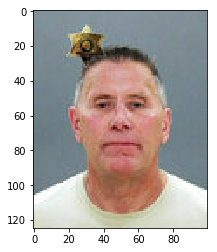

In [66]:
img = plt.imread(f"../data/thumbnail/{img_id[0]}.jpg")
plt.imshow(img)

In [71]:
img_alltags[img_alltags['id'] == img_id[0]]

,id,article_idx,tag,tag_relation,tag_code,type
48218,0d660832c63448f7b93515114a04a338,964285bee74e430cb22441e59a968e76,NaN,NaN,NaN,person
185288,0d660832c63448f7b93515114a04a338,964285bee74e430cb22441e59a968e76,New York,direct,b58f18a082c6100487fbdf092526b43e,place
185289,0d660832c63448f7b93515114a04a338,964285bee74e430cb22441e59a968e76,United States,direct,661e48387d5b10048291c076b8e3055c,place
185290,0d660832c63448f7b93515114a04a338,964285bee74e430cb22441e59a968e76,North America,ancestor,661850e07d5b100481f7c076b8e3055c,place
56830,0d660832c63448f7b93515114a04a338,964285bee74e430cb22441e59a968e76,NaN,NaN,NaN,org


In [ ]:
pd.read_csv("../data/clean_data/i")

In [25]:
article_id = '964285bee74e430cb22441e59a968e76'
art_alltags[art_alltags['id'] == article_id][['tag', 'type']]

,tag,type
0,General news,subject
1,Crime,subject
2,Arrests,subject
3,Law and order,subject
4,Criminal investigations,subject
0,NaN,person
0,New York,place
1,United States,place
2,North America,place
0,NaN,org


In [46]:
entities = pd.DataFrame.dropna(art_alltags[art_alltags['id'] == article_id])['tag'].values
entities

array(['General news', 'Crime', 'Arrests', 'Law and order',
       'Criminal investigations', 'New York', 'United States',
       'North America'], dtype=object)

In [26]:
art_alltags[art_alltags['id'] == article_id]['type'].values

array(['subject', 'subject', 'subject', 'subject', 'subject', 'person',
       'place', 'place', 'place', 'org'], dtype=object)

In [27]:
with open(f"../data/full_text/{article_id}.json") as json_file:
    data = json.load(json_file)
article_id = data['id']
text = data['full_text']

In [28]:
data

{'id': '964285bee74e430cb22441e59a968e76',
 'full_text': "AVON, N.Y. (AP) — Authorities say a western New York man has been arrested after he called 911 to say he was violating the terms of his probation.The Livingston County sheriff's office says 62-year-old Brian Seaver, of Avon, called 911 on Thursday and then hung up.Sheriff Thomas Dougherty says a deputy went to investigate and determined that Seaver had earlier called 911 to report that he was drinking and violating the conditions of his probation.Dougherty says Seaver had four active orders of protection ordering him to stay away from a particular person, and he was with that person.Seaver was arrested on four counts of felony criminal contempt. It's not clear if he has a lawyer who can speak for him."}

In [35]:
# with open(f"../data/article/{article_id}.json") as json_file:
#     metadata = json.load(json_file)
# # text = data['full_text']
# # for people in metadata['data']['item']['person']:
# #     print(people['name'])

# # Get tagging API entities
# entities = []
# cat_type = ['person', subject', 'organisation', 'place']
# for cat in cat_type:
#     for data in metadata['data']['item'][cat]:
#         entities.append(data['name']) # concat all metadata into this
# entities = np.array(entities)
# entities = entities[np.where(entities != "i")] # drop "i" from editor

In [36]:
text

"AVON, N.Y. (AP) — Authorities say a western New York man has been arrested after he called 911 to say he was violating the terms of his probation.The Livingston County sheriff's office says 62-year-old Brian Seaver, of Avon, called 911 on Thursday and then hung up.Sheriff Thomas Dougherty says a deputy went to investigate and determined that Seaver had earlier called 911 to report that he was drinking and violating the conditions of his probation.Dougherty says Seaver had four active orders of protection ordering him to stay away from a particular person, and he was with that person.Seaver was arrested on four counts of felony criminal contempt. It's not clear if he has a lawyer who can speak for him."

In [48]:
en = textacy.load_spacy_lang("en_core_web_sm", disable=("parser",))
doc = textacy.make_spacy_doc(text, lang=en)

In [14]:
import textacy.ke

In [47]:
# Extract textrank of named entities
textrank_entities, textrank_score, entities_list = extract_textrank_from_text(text, tagging_API_entities = entities)
textrank_entities, textrank_score, entities_list

Entities before textrank: ['Arrests' 'Crime' 'Criminal investigations' 'General news'
 'Law and order' 'New York' 'North America' 'United States']


(array(['western New York man'], dtype='<U25'), array([0.04]), ['New York'])

In [49]:
textacy.ke.textrank(doc, normalize="lemma", topn=10, window_size=3)

[('old Brian Seaver', 0.03851944536658275),
 ('western New York man', 0.03580811632003657),
 ('Livingston County sheriff', 0.02845169412896452),
 ('Sheriff Thomas Dougherty', 0.026781333097282166),
 ('felony criminal contempt', 0.02605804076735671),
 ('particular person', 0.023410834865791555),
 ('active order', 0.019563687403313712),
 ('AP', 0.010439974828442),
 ('probation', 0.00971709526479497),
 ('office', 0.009575940379209273)]

In [24]:
pd.DataFrame([textrank_entities, textrank_score, entities_list]).T.rename(columns = \
              {0:"TextRank Bags of Words", 1:"TextRank Importance Score", 2:"Tagging API Named Entities"})

,TextRank Bags of Words,TextRank Importance Score,Tagging API Named Entities
0,Party leader Kemal Kilicdaroglu,0.05,Kemal Kilicdaroglu
1,President Recep Tayyip Erdogan,0.04,Recep Tayyip Erdogan
2,Turkey,0.02,Turkey
3,Ankara,0.01,Ankara


In [10]:
ts.basic_counts['n_words'] ## CHECK ## doesn't match

137

## TextRank

In [11]:
import textacy.ke

In [12]:
textacy.spacier.utils.get_normalized_text()

TypeError: get_normalized_text() missing 1 required positional argument: 'span_or_token'

In [83]:
textacy.TextStats(doc).basic_counts['n_words']


137

In [85]:
textacy.ke.textrank(doc, normalize="lemma", topn=10, window_size=3)

[('Party leader Kemal Kilicdaroglu', 0.047500269373415754),
 ('opposition party leader', 0.04491151046482916),
 ('Interior Minister Suleyman Soylu', 0.0393905668124247),
 ('President Recep Tayyip Erdogan', 0.03529180424934934),
 ('municipal election', 0.02023076940656441),
 ('kurdish rebel', 0.02017311337306259),
 ('mayoral election', 0.019878721600533583),
 ('Republican People', 0.019007513261570123),
 ('Turkey', 0.018045623982279352),
 ('divisive campaign', 0.014757984913261336)]

In [87]:
textacy.ke.textrank(doc, normalize="lemma", topn=10, window_size=2)

[('Party leader Kemal Kilicdaroglu', 0.04617915923493072),
 ('opposition party leader', 0.04196247513260644),
 ('President Recep Tayyip Erdogan', 0.03830877804676011),
 ('Interior Minister Suleyman Soylu', 0.037198656876395696),
 ('municipal election', 0.020586955135560664),
 ('kurdish rebel', 0.020301421625340613),
 ('mayoral election', 0.01961960693434969),
 ('Republican People', 0.017306950928731746),
 ('Turkey', 0.015486631465300623),
 ('divisive campaign', 0.015011340305379331)]

## Use named entities only in TextRank

In [31]:
entities_list_fulltext_df = pd.read_csv("../data/entities_list_full_text_dedup.csv")

In [32]:
entities_list_fulltext_df.shape, entities_list_fulltext_df.drop_duplicates(['text', 'article_id']).shape

((764798, 5), (764798, 5))

In [33]:
trial_id = '0a0e0db8ae42425897b6381481663611'
trial_entities_df = entities_list_fulltext_df[entities_list_fulltext_df['article_id'] == '0a0e0db8ae42425897b6381481663611']


In [34]:
trial_entities_df.shape, trial_entities_df.drop_duplicates(['text']).shape

((15, 5), (15, 5))

In [35]:
trial_entities_df

,Unnamed: 0,Unnamed: 0.1,text,label,article_id
50077,82862,0,ANKARA,ORG,0a0e0db8ae42425897b6381481663611
50078,82863,1,Turkey,GPE,0a0e0db8ae42425897b6381481663611
50079,82864,2,AP,ORG,0a0e0db8ae42425897b6381481663611
50080,82866,4,Republican People's Party,ORG,0a0e0db8ae42425897b6381481663611
50081,82867,5,Kemal Kilicdaroglu,PERSON,0a0e0db8ae42425897b6381481663611
50082,82868,6,Ankara,GPE,0a0e0db8ae42425897b6381481663611
50083,82869,7,Kilicdaroglu,PERSON,0a0e0db8ae42425897b6381481663611
50084,82870,8,Suleyman Soylu,PERSON,0a0e0db8ae42425897b6381481663611
50085,82871,9,Kurdish,NORP,0a0e0db8ae42425897b6381481663611
50086,82872,10,Soylu,ORG,0a0e0db8ae42425897b6381481663611


In [ ]:
extract_textrank_from_text()

In [50]:
# Get relevant entities
rel_gp = ['PERSON', 'GPE']
trial_entities = trial_entities_df['text'][trial_entities_df['label'].isin(rel_gp)].values
trial_entities

array(['Turkey', 'Kemal Kilicdaroglu', 'Ankara', 'Kilicdaroglu',
       'Suleyman Soylu', 'Istanbul', "Recep Tayyip Erdogan's", 'Erdogan'],
      dtype=object)

In [102]:
np.unique(trial_entities)

array(['Ankara', 'Erdogan', 'Istanbul', 'Kemal Kilicdaroglu',
       'Kilicdaroglu', "Recep Tayyip Erdogan's", 'Suleyman Soylu',
       'Turkey'], dtype=object)

In [78]:
doc

ANKARA, Turkey (AP) — Turkey's interior minister says nine people have been detained in the assault of an opposition party leader, who was hit during a soldier's funeral.Several protesters threw punches at Republican People's Party leader Kemal Kilicdaroglu at the funeral outside Ankara on Sunday. Kilicdaroglu was not injured.Interior Minister Suleyman Soylu said Monday nine people were detained for questioning.The soldier was killed Saturday in clashes with Kurdish rebels. Soylu appeared to justify Kilicdaroglu's assault by referring to the support a pro-Kurdish gave the opposition during Turkey's March 31 municipal elections.Soylu said: "Everyone must take sides against the (rebels)."The Republican People's Party won the mayoral elections in Ankara and Istanbul, supplanting President Recep Tayyip Erdogan's party.Erdogan led a divisive campaign, equating opposition parties with terrorists.

In [37]:
window_size = 2
trial_textrank = textacy.ke.textrank(doc, normalize="lemma", topn=10, window_size=window_size)
textrank_words = [textrank[0] for textrank in trial_textrank]

In [42]:
textrank_words

['Party leader Kemal Kilicdaroglu',
 'opposition party leader',
 'President Recep Tayyip Erdogan',
 'Interior Minister Suleyman Soylu',
 'municipal election',
 'kurdish rebel',
 'mayoral election',
 'Republican People',
 'Turkey',
 'divisive campaign']

In [101]:
get_textrank_entities_only(np.array(textrank_words), trial_entities)

array(['Party leader Kemal Kilicdaroglu',
       'President Recep Tayyip Erdogan',
       'Interior Minister Suleyman Soylu', 'Turkey'], dtype='<U32')